## Getting Data:
"""
The data used in this project is from a dataset in this url : <a>https://www.kaggle.com/datasets/wenruliu/adult-income-dataset</a>

we will not use all column because not all of them looks relevent to our subject 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Read data from file as a dataframe

In [4]:
#Read raw data 
data = pd.read_csv('./data/adult.csv')
data.shape # (48842, 15)
data.dtypes
# data.describe

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

### Remove unwanted columns

In [5]:
data = data.drop(['fnlwgt','educational-num','relationship','race','native-country'],axis=1)
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'income'],
      dtype='object')

# EDA
### Understanding data
All columns exist in our data

In [8]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'income'],
      dtype='object')

### Extract all values in data
Showing all non numerical values of data

In [60]:
# Showing all non numerical values of data

not_null_data = data[~data.isin(['?']).any(axis=1)] # Datarows which has ? are removed
data_elements = {col : not_null_data[col].unique() for col in ['education','workclass','marital-status','occupation','gender']} # non numerical columns
data_val = pd.DataFrame(dict([(c, pd.Series(v)) for c, v in data_elements.items()]))
data_val 

,education,workclass,marital-status,occupation,gender
0,11th,Private,Never-married,Machine-op-inspct,Male
1,HS-grad,Local-gov,Married-civ-spouse,Farming-fishing,Female
2,Assoc-acdm,Self-emp-not-inc,Widowed,Protective-serv,NaN
3,Some-college,Federal-gov,Separated,Other-service,NaN
4,10th,State-gov,Divorced,Prof-specialty,NaN
5,Prof-school,Self-emp-inc,Married-spouse-absent,Craft-repair,NaN
6,7th-8th,Without-pay,Married-AF-spouse,Adm-clerical,NaN
7,Bachelors,NaN,NaN,Exec-managerial,NaN
8,Masters,NaN,NaN,Tech-support,NaN
9,Doctorate,NaN,NaN,Sales,NaN


In [61]:
# Bigger than 50K
big_sal = data[data['income']=='>50K']
a = big_sal['age'].value_counts().sort_values()
a

age
84      1
85      1
88      1
20      1
83      2
     ... 
37    422
39    423
41    427
47    429
46    439
Name: count, Length: 68, dtype: int64

### Age and income (Histogram)


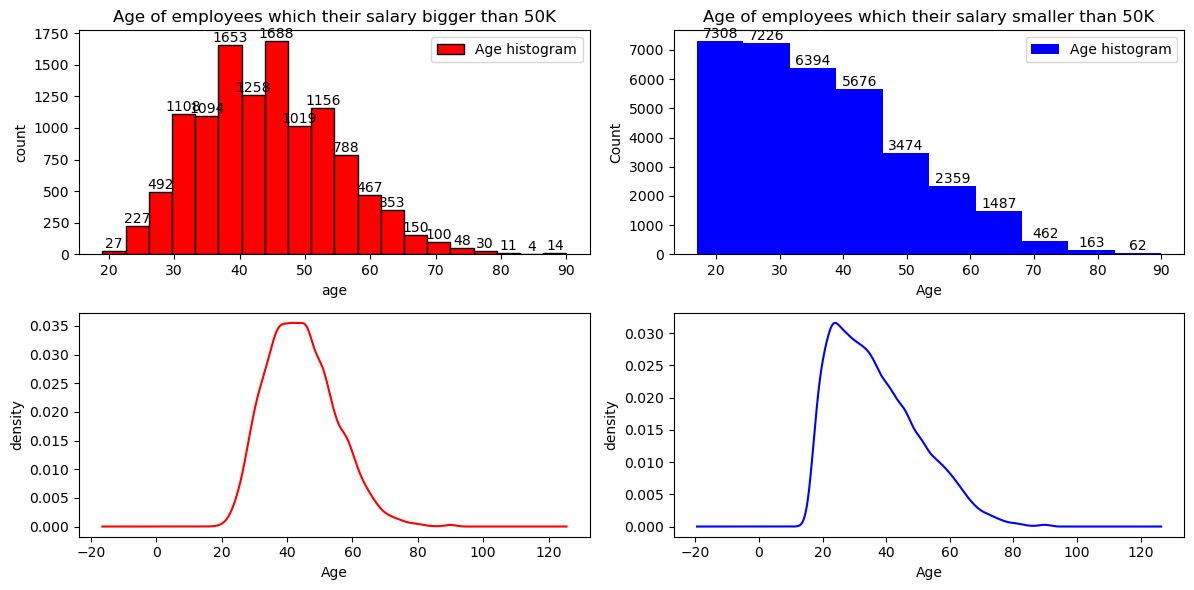

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Bigger than 50K
big_sal = data[data['income']=='>50K']
big_sal['age'].plot(kind='hist',ax=axes[0][0],label='Age histogram',bins=20,
                      title='Age of employees which their salary bigger than 50K',
                      color='red', edgecolor='black')

axes[0][0].set_xlabel('age')
axes[0][0].set_ylabel('count')
axes[0][0].legend()
for container in axes[0][0].containers:
    axes[0][0].bar_label(container, label_type='edge')
axes[0][0].plot()

big_sal['age'].plot(kind='kde',ax=axes[1][0],label='Age KDE',
                      color='red')
axes[1][0].set_xlabel('Age')
axes[1][0].set_ylabel('density')
axes[1][0].plot()

# lesser than 50K
small_sal = not_null_data[not_null_data['income']=='<=50K']
small_sal['age'].plot(kind='hist', ax=axes[0][1],label='Age histogram',bins=10,
                      title='Age of employees which their salary smaller than 50K',
                      color='blue')
axes[0][1].set_xlabel('Age')
axes[0][1].set_ylabel('Count')
axes[0][1].legend()
for container in axes[0][1].containers:
    axes[0][1].bar_label(container, label_type='edge')
axes[0][1].plot()

small_sal['age'].plot(kind='kde',ax=axes[1][1],label='Age KDE',
                      color='blue')
axes[1][1].set_xlabel('Age')
axes[1][1].set_ylabel('density')
axes[1][1].plot()


plt.tight_layout()
plt.show()

## Education per Income (Bar)
  

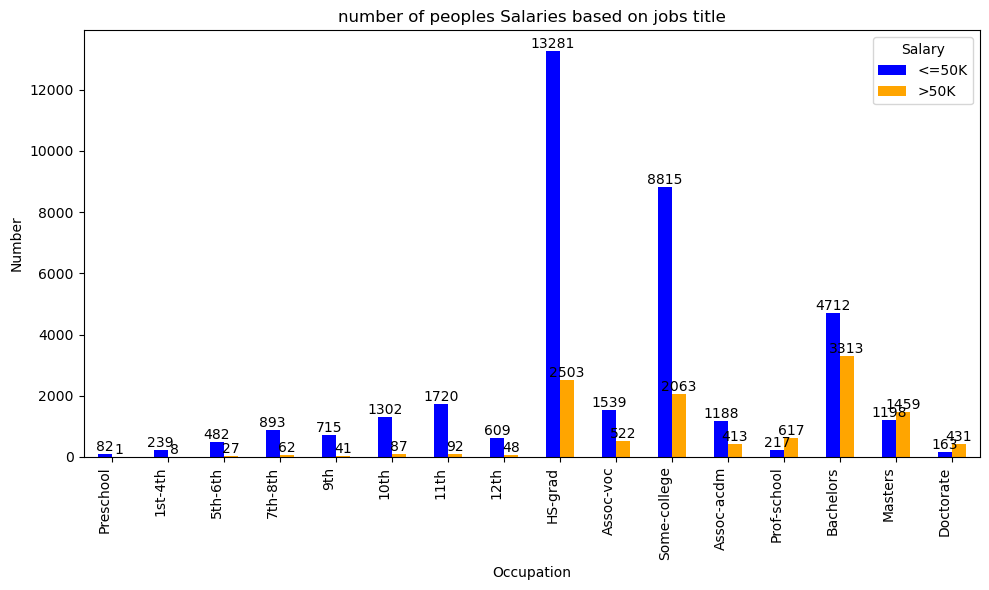

In [63]:
# Education levels its ordered based on level of education
educations = ['Preschool', '1st-4th','5th-6th',
              '7th-8th', '9th', '10th',
              '11th', '12th', 'HS-grad',
              'Assoc-voc', 'Some-college', 'Assoc-acdm',
               'Prof-school', 'Bachelors', 'Masters','Doctorate',
                ]
# Group by occupation and salary and count occurrences
Education_counts = data.groupby(['education', 'income']).size().unstack(fill_value=0)

# Plot the bar chart
Education_counts['total'] = Education_counts.sum(axis=1)
Education_counts_sorted = Education_counts.loc[educations].drop(columns='total')


ax = Education_counts_sorted.plot(kind='bar', stacked=False, figsize=(10, 6), color=['blue', 'orange'])
# Add labels and title
plt.title('number of peoples Salaries based on jobs title')
plt.xlabel('Occupation')
plt.ylabel('Number')
plt.xticks(ha='right')
plt.legend(title='Salary')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
# Show the plot
plt.tight_layout()
plt.show()

## Work class and income (Pie)

[]

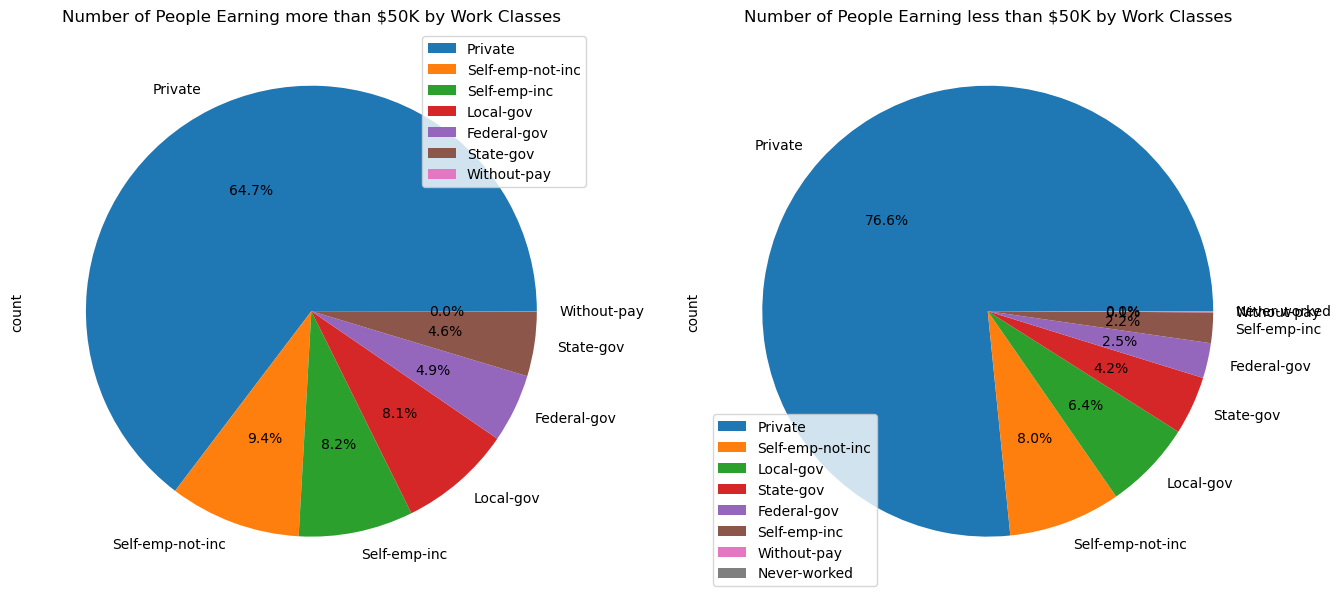

In [64]:
# Group by work class and salary and count occurrences

big_sal = data[data['income'] == '>50K']
big_sal = big_sal[big_sal['workclass'] != '?']

sml_sal = data[data['income'] == '<=50K']
sml_sal = sml_sal[sml_sal['workclass'] != '?']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

big_sal['workclass'].value_counts().plot(kind='pie',ax=axes[0],title='Number of People Earning more than $50K by Work Classes', autopct='%1.1f%%')
axes[0].legend(loc='best')
axes[0].plot()

sml_sal['workclass'].value_counts().plot(kind='pie',ax=axes[1],title='Number of People Earning less than $50K by Work Classes', autopct='%1.1f%%')
axes[1].legend(loc='best')
axes[1].plot()


# Data cleaning for model training
### Remove rows which has empty value. it marked by '?'

In [5]:
data = data[~data.isin(['?']).any(axis=1)]
data.count()

age               46033
workclass         46033
education         46033
marital-status    46033
occupation        46033
gender            46033
capital-gain      46033
capital-loss      46033
hours-per-week    46033
income            46033
dtype: int64

### Check Data is ***Balanced***

In [6]:
# count numbers of which employees has more 50 k as salary and vice-versa
data['income'].value_counts()

income
<=50K    34611
>50K     11422
Name: count, dtype: int64

#### As we see earlier the data is imbalanced 
> "<=50K" : 34611

> ">50K" : 11422

#### This issue leads to a ***Biased*** model
#### there is multiple ways to fix the issue by *RandomUnderSampler* function or *Class weight* function

# Use RandomUnderSampler

In [100]:
# import library
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt



In [63]:
from collections import Counter
X = data.drop(['income'],axis=1)
y = data["income"]
print(Counter(y))

rus = RandomUnderSampler(random_state=40)
X, y = rus.fit_resample(X,y)
print(Counter(y))

Counter({'<=50K': 34611, '>50K': 11422})
Counter({'<=50K': 11422, '>50K': 11422})


In [64]:
# X.info()
X.shape
# y.info()
y.shape

(22844,)

In [65]:
# Split data into Train and validation set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [66]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(
   include=["object"]
).columns.tolist()

numerical_features = X.select_dtypes(
   include=["float64", "int64"]
).columns.tolist()

In [67]:
preprocessor = ColumnTransformer(
   transformers=[
       ("cat", OneHotEncoder(), categorical_features),
       ("num", StandardScaler(), numerical_features),
   ]
)

In [68]:
pipeline = Pipeline(
   [
       ("preprocessor", preprocessor),
       ("classifier", GradientBoostingClassifier(random_state=42)),
   ]
)


In [72]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Predict Probability on the test set
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Generate classification report
report = classification_report(y_test, y_pred)


In [73]:
# After cleansing
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print("\nClassification Report:")
print(report)


Mean Cross-Validation Accuracy: 0.8294

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.85      0.80      0.82      2258
        >50K       0.81      0.87      0.84      2311

    accuracy                           0.83      4569
   macro avg       0.83      0.83      0.83      4569
weighted avg       0.83      0.83      0.83      4569



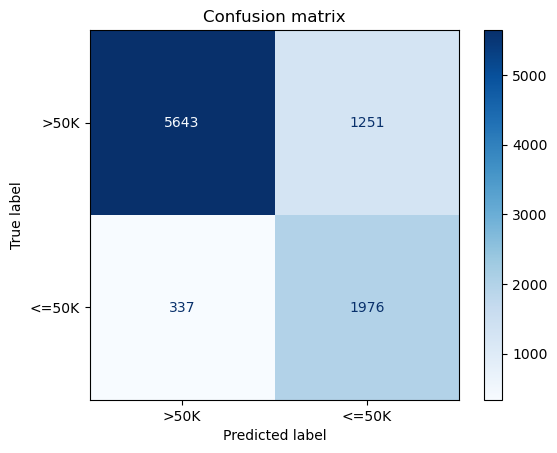

In [110]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_show = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['>50K', '<=50K'])
cm_show.plot(cmap='Blues')
plt.title('Confusion matrix')
plt.show()

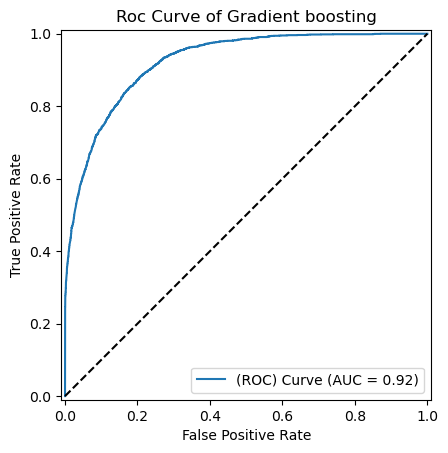

In [157]:
# Calculate True Positive Rate (TPR), False Positive Rate (FPR), and Thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='>50K')

roc_auc = auc(fpr, tpr)
# Calculate AUC Score:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                          estimator_name='(ROC) Curve')

display.plot()
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Roc Curve of Gradient boosting')
plt.show()

# Class Weight Training

In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, ValidationCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

In [117]:
X = data.drop(['income'],axis=1)
y = data["income"]

In [134]:
# Get classes
y_mapped = y.map({'>50K': 1, '<=50K': 0})  # change class from number to boolean
classes = np.unique(y_mapped)
# Calculate classes weights
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_mapped)

# to dict
class_weight_dict = dict(zip(classes, class_weights))
class_weight_dict


{0: 0.6650053451214931, 1: 2.015102433899492}

In [135]:
# Split data into Train and validation set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [136]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(
   include=["object"]
).columns.tolist()

numerical_features = X.select_dtypes(
   include=["float64", "int64"]
).columns.tolist()

In [137]:
preprocessor = ColumnTransformer(
   transformers=[
       ("cat", OneHotEncoder(sparse_output=False), categorical_features),# It shows an error unlike the first model
       ("num", StandardScaler(), numerical_features),
   ]
)

In [153]:
pipeline = Pipeline(
   [
       ("preprocessor", preprocessor),
       ("classifier", HistGradientBoostingClassifier(random_state=42,class_weight=class_weight_dict)),
   ]
)


In [154]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Predict Probability on the test set
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Generate classification report
report = classification_report(y_test, y_pred)


In [141]:
# After cleansing
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print("\nClassification Report:")
print(report)


Mean Cross-Validation Accuracy: 0.8330

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.94      0.82      0.88      6894
        >50K       0.61      0.85      0.71      2313

    accuracy                           0.83      9207
   macro avg       0.78      0.84      0.80      9207
weighted avg       0.86      0.83      0.84      9207



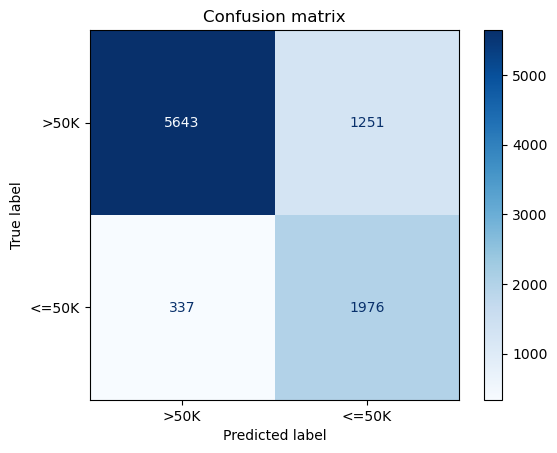

In [142]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_show = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['>50K', '<=50K'])
cm_show.plot(cmap='Blues')
plt.title('Confusion matrix')
plt.show()

## True/False positive Rate

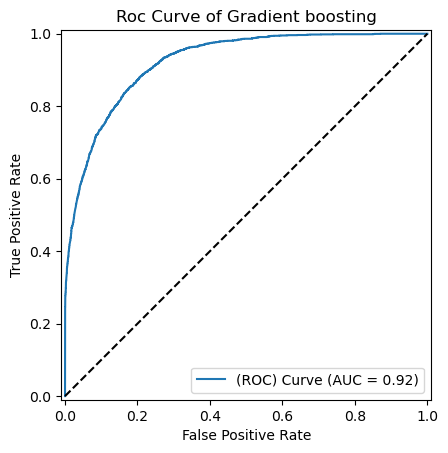

In [160]:
# Calculate True Positive Rate (TPR), False Positive Rate (FPR), and Thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='>50K')

roc_auc = auc(fpr, tpr)
# Calculate AUC Score:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                          estimator_name='(ROC) Curve')

display.plot()
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Roc Curve of Gradient boosting')
plt.show()